### Importing needed libraries

In [17]:
import easyocr # to use an ocr model
import cv2 # to accept and show an image
from matplotlib import pyplot as plt
import numpy as np

In [18]:
IMAGE_PATH = 'images/surf.jpeg'
IMAGE_PATH_MULTILINE = 'images/sign.png'

font = cv2.FONT_HERSHEY_COMPLEX # the font of the text

### Recognizing text from an image

In [19]:
# initialize the reader by specifying the language and use of gpu
reader = easyocr.Reader(['en'], gpu=False) 
# read the image
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[18, 18], [293, 18], [293, 145], [18, 145]], 'SURF', 0.9862082004547119)]

In [20]:
top_left = tuple(result[0][0][0]) # top left corner of the text
bottom_right = tuple(result[0][0][2]) # bottom right corner of the text
text_pos = tuple(np.subtract(top_left, [5, 5])) # calculate the position of the text
text = result[0][1] # the text

### Configurations to the image

In [21]:
img = cv2.imread(IMAGE_PATH) # read the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert the image to RGB
img = cv2.rectangle(img, top_left, bottom_right, (0,0,255), 3) # draw a rectangle around the text
img = cv2.putText(img, text, text_pos, font, 0.5, (255,0,0), 1, cv2.LINE_AA) # put the text


### Draw the result


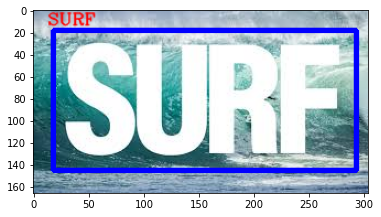

In [22]:
plt.imshow(img) # show the image
plt.show() # plot the image 

### Recognizing multiple lines of text

In [28]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH_MULTILINE)

Using CPU. Note: This module is much faster with a GPU.


In [29]:
result

[([[19, 181], [165, 181], [165, 201], [19, 201]],
  'HEAD PROTECTION',
  0.9778256296390029),
 ([[31, 201], [153, 201], [153, 219], [31, 219]],
  'MUST BE WORN',
  0.9699984126042),
 ([[39, 219], [145, 219], [145, 237], [39, 237]],
  'ON THIS SITE',
  0.9683973478739152)]

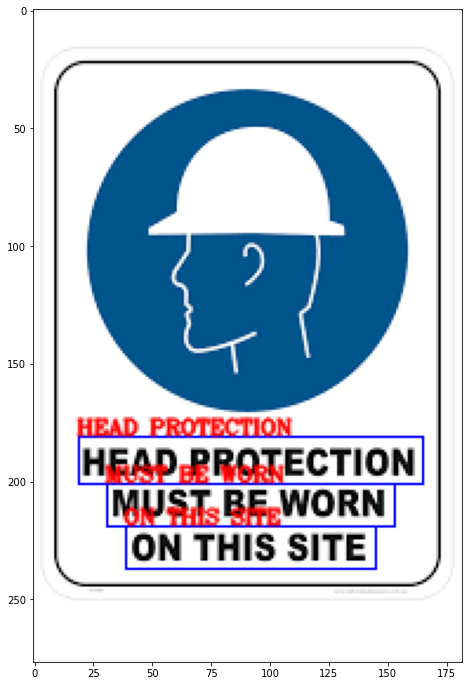

In [30]:
img = cv2.imread(IMAGE_PATH_MULTILINE) # read the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert the image to RGB

for item in result:

    top_left = tuple(item[0][0]) # top left corner of the text
    bottom_right = tuple(item[0][2]) # bottom right corner of the text
    text = item[-2] # the text
    
    cv2.rectangle(img, top_left, bottom_right, (0,0,255), 1) # draw a rectangle around the text
    cv2.putText(img, text, np.subtract(top_left, [1, 1]), font, 0.3, (255,0,0), 1, cv2.LINE_AA) # put the text

plt.figure(figsize=(12,12)) # create a figure with a size of 12x12
plt.imshow(img) # show the image
plt.show() # plot the image